# Análisis exploratorio de los datos

## Introducción


 Este ejercicio también nos da la oportunidad para reflexionar sobre los distintos aspectos de la realidad.

## Hipótesis

Si aludimos a la marginación como un fenomeno multidimensional y estructural que se manifiesta como la falta de oportunidades y la desigual distribución del progreso en la estructura productiva (hecho que excluye a diversos grupos sociales). Se entiende que se comprometen los niveles de bienestar y la creación de capacidades, recursos y, por ende, el desarrollo, debido a que y de acuerdo con la CONAPO, "las desventajas  ocasionadas por la marginación son acumulables". 

Se espera encontrar un mayor índice de marginación en aquellos municipios en los que sus vecinos esten catalogados como marginados, 

In [2]:
%matplotlib inline
from pylab import *
import csv
import pandas as pd

In [70]:
#db2 = pd.read_csv('IM.csv', index_col="CVE_MUN")
#db2.head()

In [4]:
db = pd.read_csv('IM.csv')
db.head()

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,AÑO
0,1,Aguascalientes,1001,Aguascalientes,877190,-,2.06,9.54,0.31,0.16,...,8.73,31.13,-,-,-1.676,Muy bajo,-,2408,11,2015
1,1,Aguascalientes,1005,Jesús María,120405,-,3.26,13.73,0.44,0.37,...,45.17,33.77,-,-,-1.256,Muy bajo,-,2229,10,2015
2,1,Aguascalientes,1003,Calvillo,56048,-,4.80,24.18,0.55,0.41,...,50.76,61.95,-,-,-0.698,Bajo,-,1799,5,2015
3,1,Aguascalientes,1007,Rincón de Romos,53866,-,3.53,14.75,1.97,0.52,...,43.06,43.44,-,-,-1.045,Bajo,-,2090,7,2015
4,1,Aguascalientes,1006,Pabellón de Arteaga,46473,-,3.41,14.90,1.00,0.42,...,31.60,41.48,-,-,-1.129,Muy bajo,-,2153,8,2015


In [5]:
#Registros,columnas
db.shape

(2458, 23)

In [6]:
#Muestra los últimos registros
db.tail()

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,AÑO
2453,32,Zacatecas,32003,Atolinga,2427,-,7.85,40.46,2.76,0.70,...,100.00,46.18,-,-,-0.46,Medio,-,1582,22,2015
2454,32,Zacatecas,32030,Momax,2404,-,5.77,30.22,0.50,0.21,...,100.00,54.43,-,-,-0.606,Bajo,-,1703,28,2015
2455,32,Zacatecas,32043,Susticacán,1329,-,8.07,34.51,2.78,0.60,...,100.00,59.53,-,-,-0.298,Medio,-,1444,12,2015
2456,32,Zacatecas,32015,El Plateado de Joaquín Amaro,1160,-,8.90,45.13,2.84,0.34,...,100.00,49.43,-,-,-0.288,Medio,-,1429,11,2015
2457,-,Nacional,-,-,119530753,-,5.53,16.50,2.14,0.95,...,28.85,37.41,-,-,-,-,-,-,-,2015


In [7]:
db.dtypes

CVE_ENT       object
ENT           object
CVE_MUN       object
MUN           object
POB_TOT        int64
VP            object
ANALF        float64
SPRIM        float64
OVSDE        float64
OVSEE        float64
OVSAE        float64
VHAC         float64
OVPT         float64
PL<5000      float64
PO2SM        float64
OVSD          object
OVSDSE        object
IM            object
GM            object
IND0A100      object
LUG_NAC       object
LUGAR_EST     object
AÑO            int64
dtype: object

Se observa que la columna de interes IM es del tipo object

In [8]:
#se pasa de object a float64
db['IM'] = pd.to_numeric(db['IM'],errors='coerce')

In [9]:
db.dtypes

CVE_ENT       object
ENT           object
CVE_MUN       object
MUN           object
POB_TOT        int64
VP            object
ANALF        float64
SPRIM        float64
OVSDE        float64
OVSEE        float64
OVSAE        float64
VHAC         float64
OVPT         float64
PL<5000      float64
PO2SM        float64
OVSD          object
OVSDSE        object
IM           float64
GM            object
IND0A100      object
LUG_NAC       object
LUGAR_EST     object
AÑO            int64
dtype: object

In [10]:
db.describe()

,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL<5000,PO2SM,IM,AÑO
count,2.458000e+03,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2457.000000,2458.0
mean,9.725855e+04,11.745854,29.268885,4.428218,2.208011,8.724931,36.275667,8.303523,71.966103,55.421408,-0.000009,2015.0
std,2.413979e+06,8.599635,11.909507,7.140824,3.594530,11.551294,11.360506,8.902754,34.691071,17.031838,0.999995,0.0
min,8.700000e+01,0.670000,2.490000,0.000000,0.000000,0.000000,7.280000,0.000000,0.000000,8.250000,-2.228000,2015.0
25%,4.253000e+03,5.240000,20.500000,0.820000,0.490000,1.500000,27.955000,1.900000,42.792500,42.885000,-0.748000,2015.0
50%,1.329950e+04,9.730000,29.415000,1.910000,1.170000,4.100000,35.010000,5.210000,100.000000,57.000000,-0.073000,2015.0
75%,3.446750e+04,15.740000,37.400000,4.667500,2.560000,10.935000,43.547500,11.417500,100.000000,68.545000,0.636000,2015.0
max,1.195308e+08,56.420000,71.240000,70.570000,57.960000,98.880000,78.460000,68.490000,100.000000,94.120000,5.027000,2015.0


In [11]:
db['IM']

0      -1.676
1      -1.256
2      -0.698
3      -1.045
4      -1.129
        ...  
2453   -0.460
2454   -0.606
2455   -0.298
2456   -0.288
2457      NaN
Name: IM, Length: 2458, dtype: float64

In [12]:
#Regitros con un índice de marginación mayor que 0.4

db[db.IM > 0.4]

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,AÑO
26,4,Campeche,4011,Candelaria,43879,-,12.80,30.29,7.61,9.04,...,76.18,60.34,-,-,0.769,Alto,-,507,1,2015
29,4,Campeche,4010,Calakmul,28424,-,15.29,29.49,4.29,3.60,...,100.00,44.78,-,-,0.706,Alto,-,563,2,2015
82,7,Chiapas,7059,Ocosingo,218893,-,22.96,40.87,3.62,9.78,...,71.01,62.96,-,-,1.417,Muy alto,-,208,22,2015
85,7,Chiapas,7031,Chilón,127914,-,30.42,47.24,12.42,8.31,...,88.86,75.04,-,-,2.238,Muy alto,-,46,5,2015
86,7,Chiapas,7052,Las Margaritas,122821,-,20.36,39.94,2.10,9.30,...,81.35,81.13,-,-,1.393,Muy alto,-,221,26,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,31,Yucatán,31031,Dzoncauich,2609,-,17.67,43.24,21.89,1.49,...,100.00,78.71,-,-,0.753,Alto,-,522,18,2015
2386,31,Yucatán,31010,Cantamayec,2519,-,18.41,41.32,36.23,5.84,...,100.00,59.10,-,-,1.262,Muy alto,-,268,5,2015
2390,31,Yucatán,31086,Tepakán,2134,-,19.38,39.97,29.62,1.31,...,100.00,67.40,-,-,0.715,Alto,-,555,22,2015
2397,31,Yucatán,31014,Cuncunul,1572,-,14.61,36.17,7.89,0.83,...,100.00,61.52,-,-,0.463,Alto,-,756,37,2015


In [13]:
#Resumen del índice de marginación
db['IM'].describe()

count    2457.000000
mean       -0.000009
std         0.999995
min        -2.228000
25%        -0.748000
50%        -0.073000
75%         0.636000
max         5.027000
Name: IM, dtype: float64

In [18]:
#Consulta toda la información contenida en la db pero solo de ciertas columnas.
explora = db.iloc[:, [1,3,4,17,18,22]] 
explora.head()

,ENT,MUN,POB_TOT,IM,GM,AÑO
0,Aguascalientes,Aguascalientes,877190,-1.676,Muy bajo,2015
1,Aguascalientes,Jesús María,120405,-1.256,Muy bajo,2015
2,Aguascalientes,Calvillo,56048,-0.698,Bajo,2015
3,Aguascalientes,Rincón de Romos,53866,-1.045,Bajo,2015
4,Aguascalientes,Pabellón de Arteaga,46473,-1.129,Muy bajo,2015


In [19]:
#Correlación entre variables
explora.corr()

,POB_TOT,IM,AÑO
POB_TOT,1.000000,-0.341477,NaN
IM,-0.341477,1.000000,NaN
AÑO,NaN,NaN,NaN


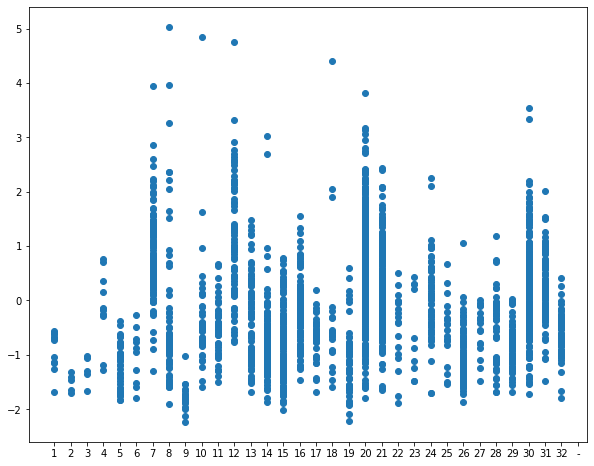

In [48]:
#Grafico de dispersión

figure(figsize=(10,8))
scatter(db.CVE_ENT, db.IM)

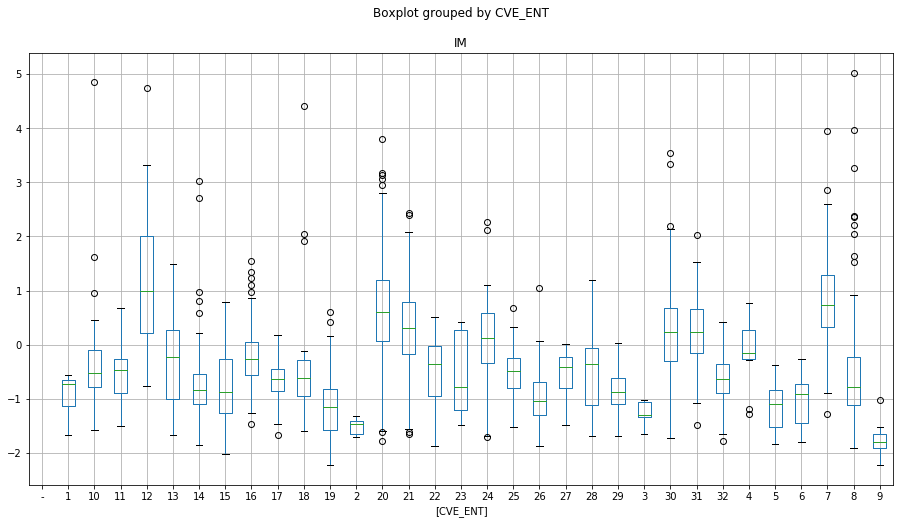

In [69]:
#Grafico de cajas y bigotes

boxplot = db.boxplot(column=['IM'], by=['CVE_ENT'], figsize=(15,8), return_type='axes')
